<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/confusion/RNN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
#load in the Data 
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
#Build the model 
i = Input(shape=x_train[0].shape)
x = LSTM (128)(i)
x = Dense(10, activation ='softmax')(x)

model = Model(i, x)

In [6]:
#compile and train 
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3280 - accuracy: 0.8949 - val_loss: 0.1250 - val_accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1036 - accuracy: 0.9687 - val_loss: 0.0986 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0728 - accuracy: 0.9778 - val_loss: 0.0797 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0596 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0500 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0532 -

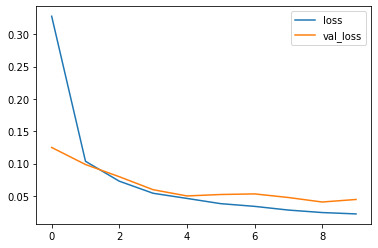

In [7]:
#plot the loss per iteration 

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

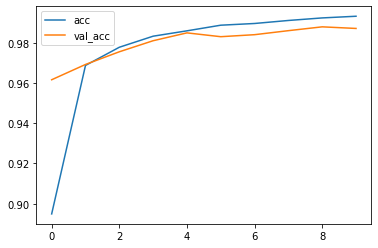

In [8]:
#plot the accuracy per iteration 
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 974    0    1    0    1    0    3    1    0    0]
 [   0 1130    0    1    0    1    2    0    1    0]
 [   0    1 1025    2    0    0    0    1    2    1]
 [   0    0    2  994    0   11    0    2    1    0]
 [   0    1    1    0  957    0    4    1    1   17]
 [   1    1    0    2    0  880    1    0    3    4]
 [   0    2    1    0    3    2  949    0    0    1]
 [   0    3   11    0    3    0    0 1009    1    1]
 [   0    0    5    5    2    2    1    2  954    3]
 [   1    0    0    1    2    1    0    5    0  999]]


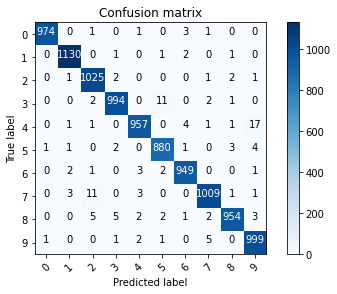

In [14]:

#Plot the confusion matrix 
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools 

def plot_confusion_matrix ( cm, classes, 
                           normalize = False, 
                           title = 'Confusion matrix', 
                           cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matric. 
  Normalization can be applied by setting using 'normalize = True'

  """
  if normalize:
      cm = cm.astype('float')/cm.sum(axis =1)[:, npnewaxis]
      print ("Normalized confusion matrix")
  else:
      print ('Confusion matrix, without normalization')
  
  print (cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.

  for i, j in itertools.product(range(cm.shape[0]), range (cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment = 'center',
              color="white" if cm [i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 8 Predicted: 7')

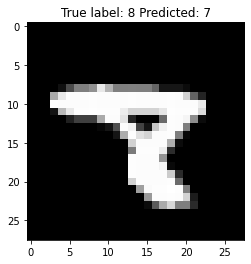

In [19]:
#Show the misclassified examples 

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))